In [1]:
import os                                                  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential             # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121      # Pre-trained models for transfer learning
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 18278 files belonging to 11 classes.


In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    'tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 4600 files belonging to 11 classes.


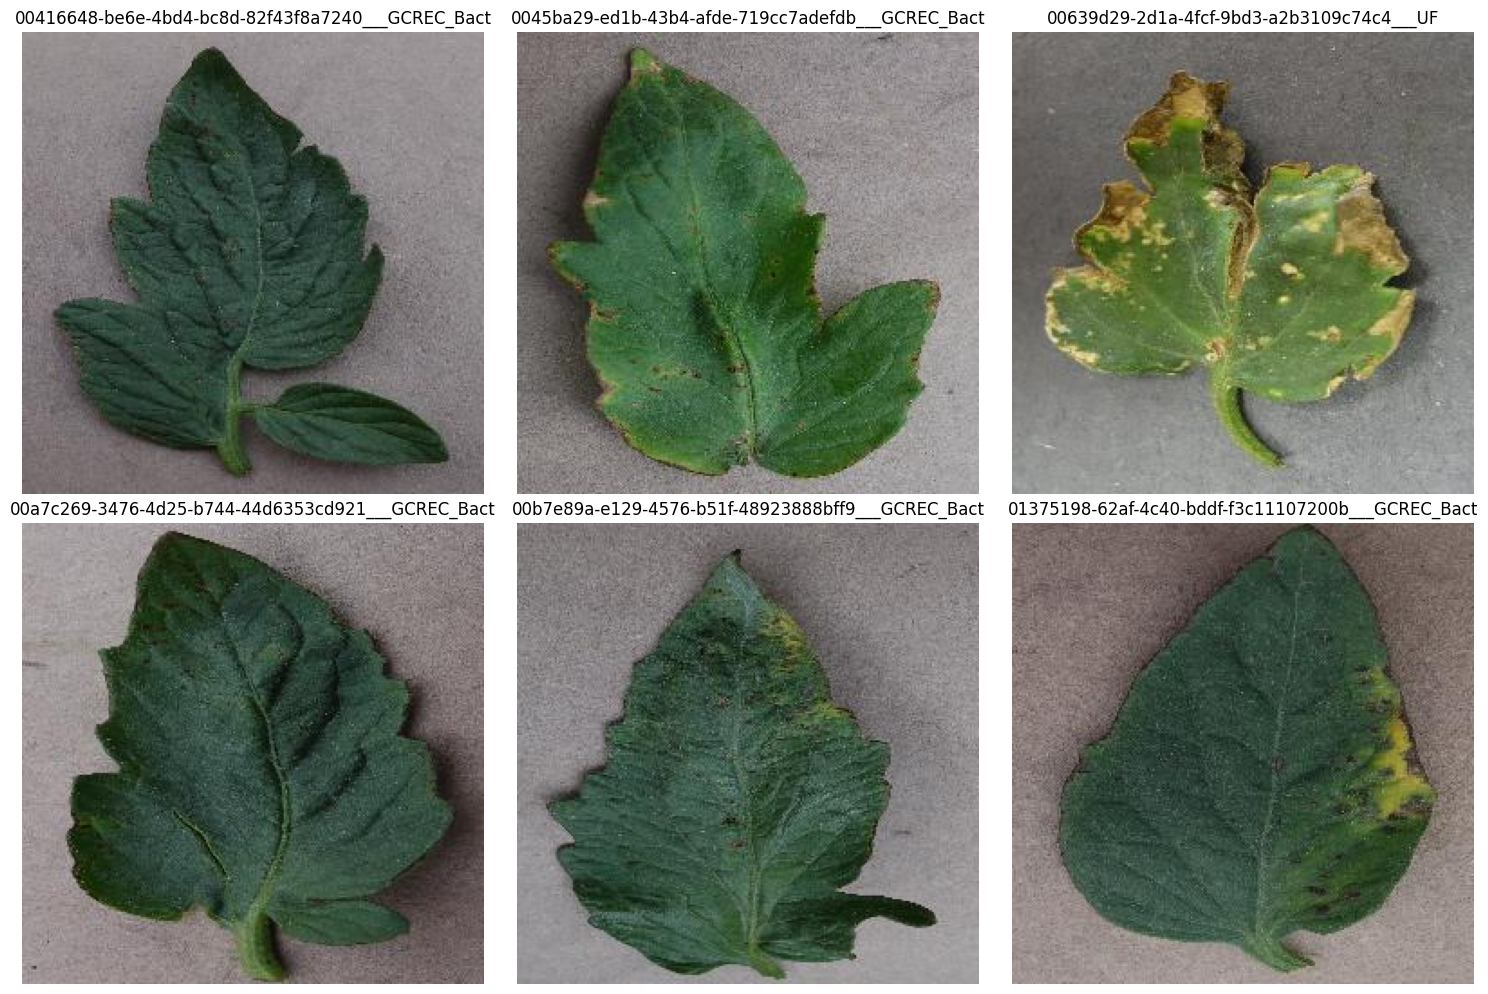

In [4]:
# Path to the directory containing images
path = "tomato/train/Tomato___Bacterial_spot"

# Getting a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Displaying the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Getting the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Loading and displaying the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

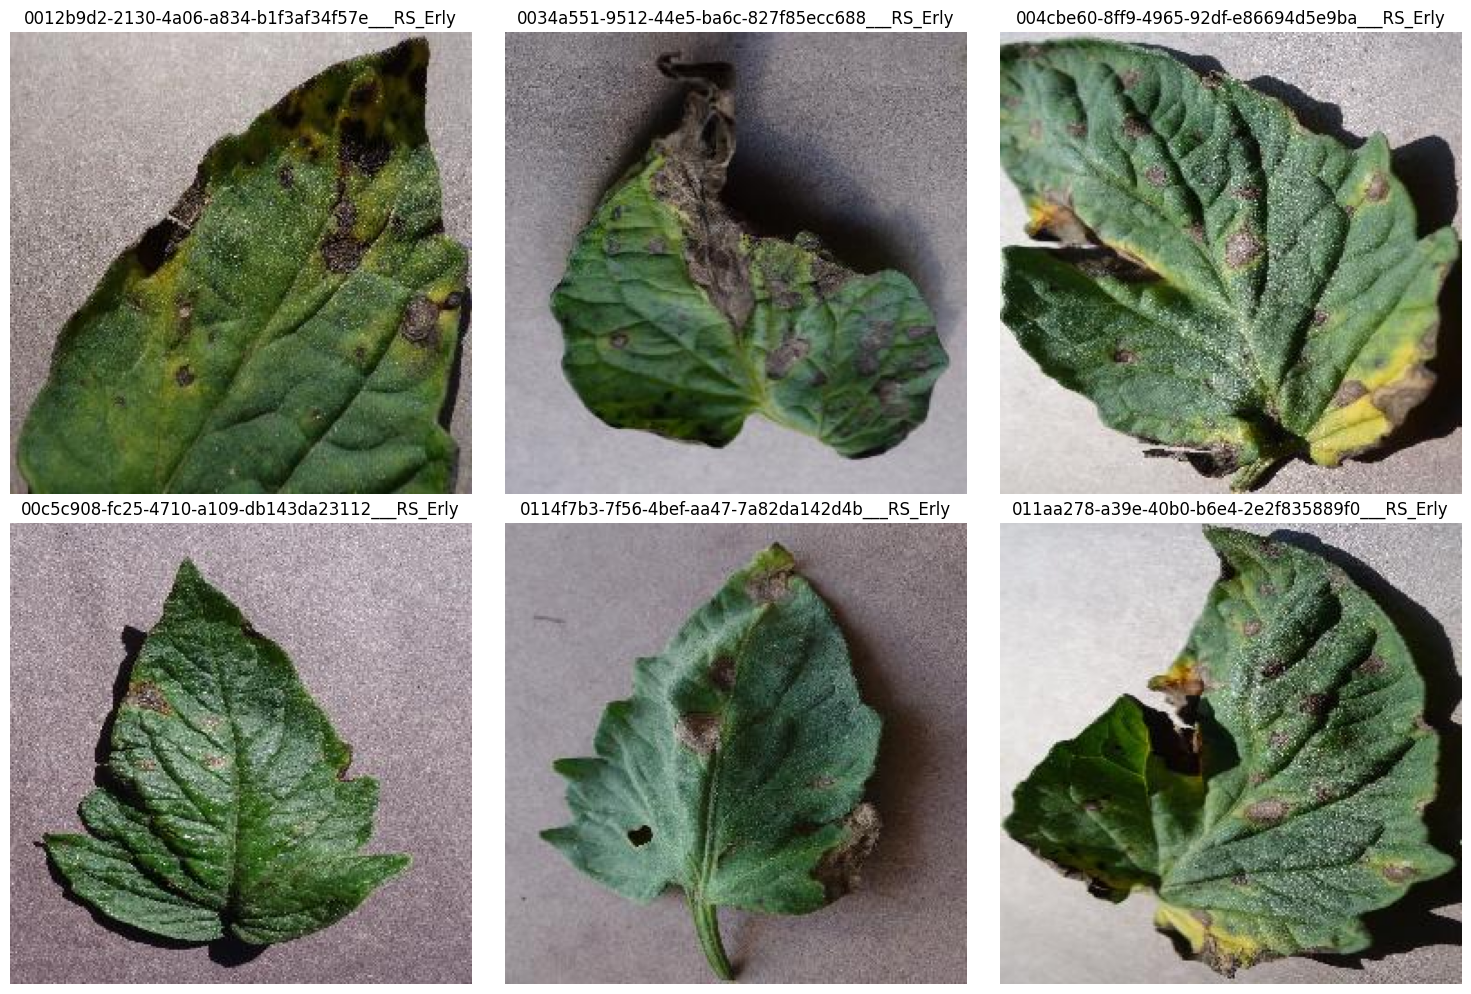

In [5]:
# Path to the directory containing images
path = "tomato/train/Tomato___Early_blight"

# Getting a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Displaying the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Geting the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Loading and displaying the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [6]:
# Downloading the model
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg')

In [7]:
conv_base.trainable = False
# Summary of the pretrained model
#conv_base.summary()

In [8]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Setting patience to 50 (or more) to ensure no early stopping
early_stopping = EarlyStopping(patience=50, monitor='val_loss', restore_best_weights=True)

history = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1850s 3s/step - accuracy: 0.4713 - loss: 1.6083 - val_accuracy: 0.8639 - val_loss: 0.5191
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1466s 3s/step - accuracy: 0.8141 - loss: 0.5881 - val_accuracy: 0.9148 - val_loss: 0.2849
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1521s 3s/step - accuracy: 0.8674 - loss: 0.4078 - val_accuracy: 0.9374 - val_loss: 0.2031
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1636s 3s/step - accuracy: 0.8969 - loss: 0.3115 - val_accuracy: 0.9520 - val_loss: 0.1577
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1568s 3s/step - accuracy: 0.9144 - loss: 0.2624 - val_accuracy: 0.9611 - val_loss: 0.1282
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1592s 3s/step - accuracy: 0.9246 - loss: 0.2225 - val_accuracy: 0.9689 - val_loss: 0.1063
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1735s 3s/step - accuracy: 0.9320 - loss: 0.2049 - val_accuracy: 0.9739 - val_loss: 0.0914
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 1815s 3s/step - accuracy: 0.9395 - loss: 0.1821 - 

In [11]:
# Evaluating the model on the validation data
evaluation = model.evaluate(val_data)

# Printing the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

144/144 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.9976 - loss: 0.0086
Validation Loss: 0.010079090483486652
Validation Accuracy: 0.9971739053726196


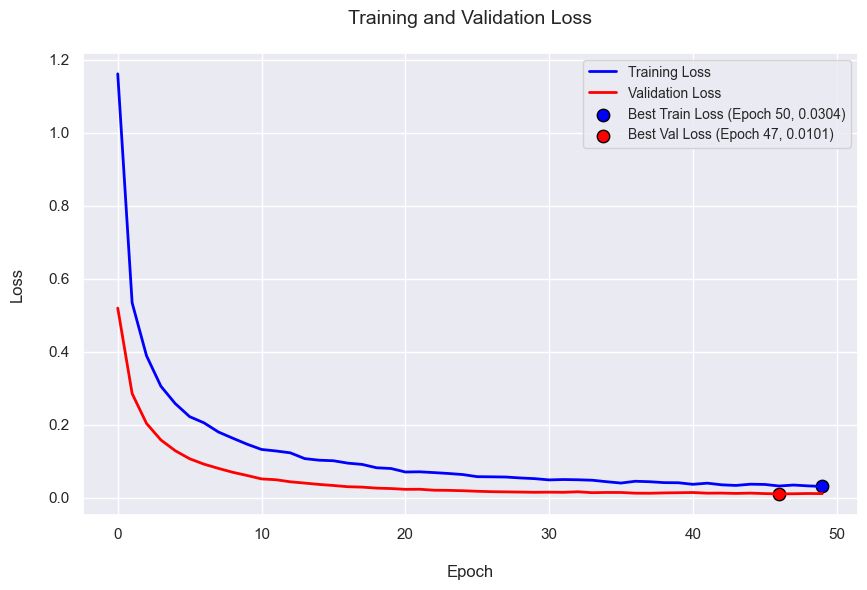

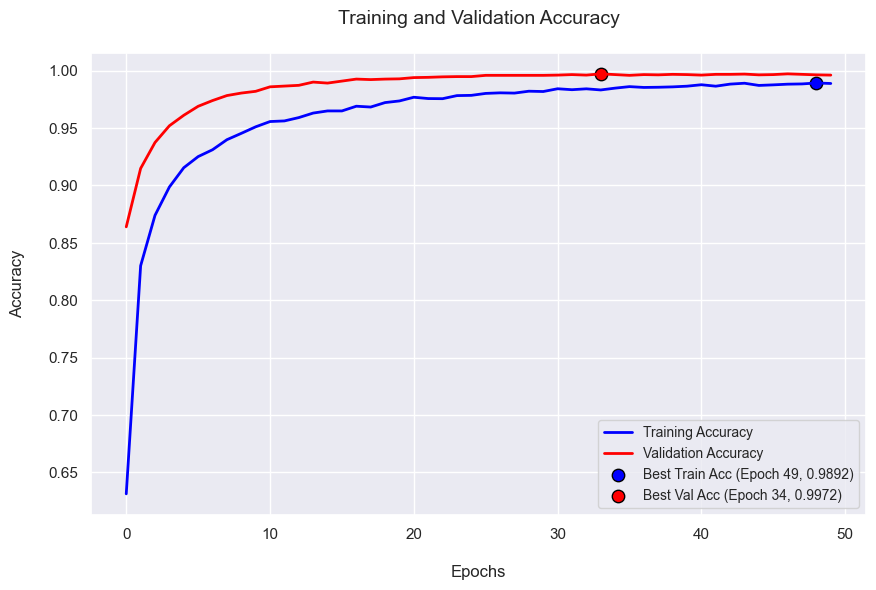

In [12]:
sns.set(style="darkgrid")

# Setting the 'history' object and 'model'
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Finding the best epoch indices
best_val_loss_epoch = val_loss.index(min(val_loss))
best_val_accuracy_epoch = val_accuracy.index(max(val_accuracy))
best_train_loss_epoch = loss.index(min(loss))
best_train_accuracy_epoch = accuracy.index(max(accuracy))

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(val_loss, label='Validation Loss', color='red', linewidth=2)
plt.scatter(best_train_loss_epoch, loss[best_train_loss_epoch], 
            color='blue', s=80, edgecolor='black', label=f'Best Train Loss (Epoch {best_train_loss_epoch + 1}, {loss[best_train_loss_epoch]:.4f})')
plt.scatter(best_val_loss_epoch, val_loss[best_val_loss_epoch], 
            color='red', s=80, edgecolor='black', label=f'Best Val Loss (Epoch {best_val_loss_epoch + 1}, {val_loss[best_val_loss_epoch]:.4f})')
plt.title('Training and Validation Loss\n', fontsize=14)
plt.xlabel('\nEpoch', fontsize=12)
plt.ylabel('Loss\n', fontsize=12)
plt.legend(loc='upper right', fontsize=10)

# Saving loss plot as SVG
plt.savefig("training_validation_loss.svg", format="svg", bbox_inches="tight")
plt.show()

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy', color='blue', linewidth=2)
plt.plot(val_accuracy, label='Validation Accuracy', color='red', linewidth=2)
plt.scatter(best_train_accuracy_epoch, accuracy[best_train_accuracy_epoch], 
            color='blue', s=80, edgecolor='black', label=f'Best Train Acc (Epoch {best_train_accuracy_epoch + 1}, {accuracy[best_train_accuracy_epoch]:.4f})')
plt.scatter(best_val_accuracy_epoch, val_accuracy[best_val_accuracy_epoch], 
            color='red', s=80, edgecolor='black', label=f'Best Val Acc (Epoch {best_val_accuracy_epoch + 1}, {val_accuracy[best_val_accuracy_epoch]:.4f})')
plt.title('Training and Validation Accuracy\n', fontsize=14)
plt.xlabel('\nEpochs', fontsize=12)
plt.ylabel('Accuracy\n', fontsize=12)
plt.legend(loc='lower right', fontsize=10)

# Saving accuracy plot as SVG
plt.savefig("training_validation_accuracy.svg", format="svg", bbox_inches="tight")
plt.show()

In [13]:
# Generating labels
true_labels = []
predicted_labels = []

for images, labels in val_data:
    # Appending true labels
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

    # Predicting labels
    predictions = model.predict(images)
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())

# Converting lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3

In [14]:
# Using 'macro' and 'weighted' averaging methods
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')

precision_weighted = precision_score(true_labels, predicted_labels, average='weighted')
recall_weighted = recall_score(true_labels, predicted_labels, average='weighted')
f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')

print("Macro Average Metrics:")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

print("\nWeighted Average Metrics:")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

Macro Average Metrics:
Precision (Macro): 0.9965
Recall (Macro): 0.9969
F1 Score (Macro): 0.9967

Weighted Average Metrics:
Precision (Weighted): 0.9972
Recall (Weighted): 0.9972
F1 Score (Weighted): 0.9972


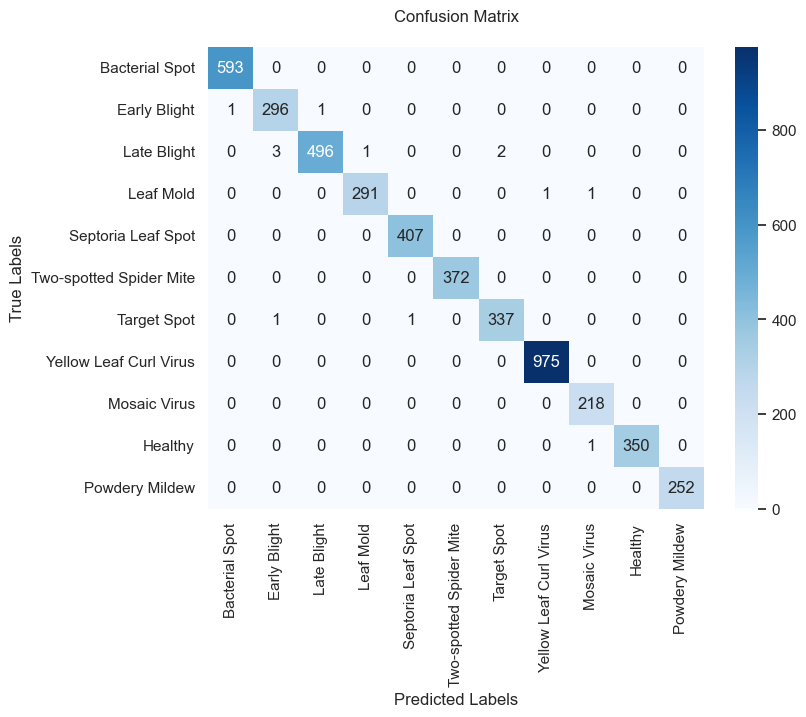

Classification Report:

                         precision    recall  f1-score   support

         Bacterial Spot       1.00      1.00      1.00       593
           Early Blight       0.99      0.99      0.99       298
            Late Blight       1.00      0.99      0.99       502
              Leaf Mold       1.00      0.99      0.99       293
     Septoria Leaf Spot       1.00      1.00      1.00       407
Two-spotted Spider Mite       1.00      1.00      1.00       372
            Target Spot       0.99      0.99      0.99       339
 Yellow Leaf Curl Virus       1.00      1.00      1.00       975
           Mosaic Virus       0.99      1.00      1.00       218
                Healthy       1.00      1.00      1.00       351
         Powdery Mildew       1.00      1.00      1.00       252

               accuracy                           1.00      4600
              macro avg       1.00      1.00      1.00      4600
           weighted avg       1.00      1.00      1.00      4600

In [18]:
# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Defining class names
class_names = ['Bacterial Spot', 'Early Blight','Late Blight', 'Leaf Mold', 
               'Septoria Leaf Spot', 'Two-spotted Spider Mite', 'Target Spot', 
               'Yellow Leaf Curl Virus', 'Mosaic Virus', 'Healthy', 'Powdery Mildew',]

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix\n')

# Saving confusion matrix as an SVG file
plt.savefig("confusion_matrix.svg", format="svg", bbox_inches="tight")
plt.show()

# Generating classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n")
print(report)

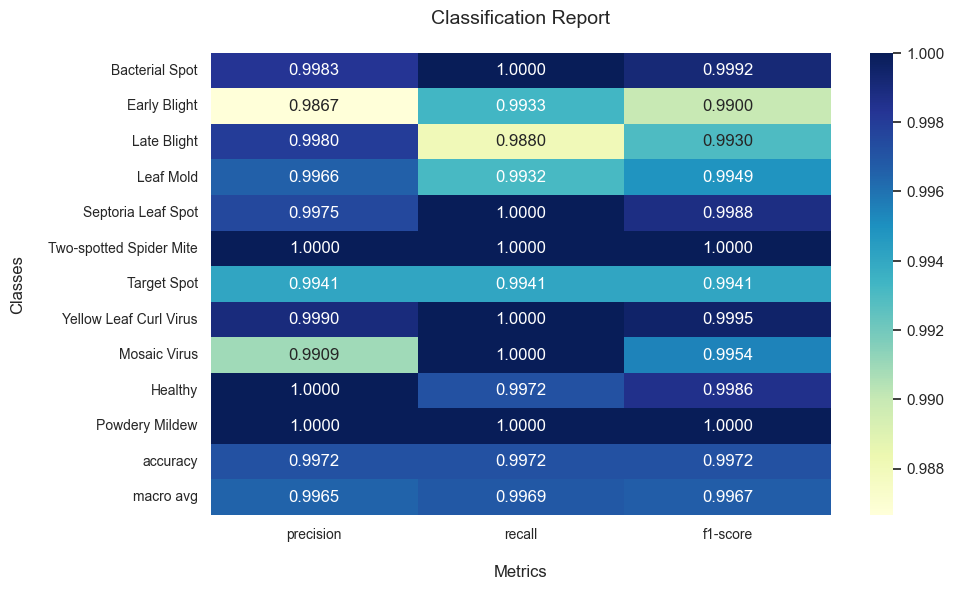

In [26]:
# Generating classification report as a dictionary
report_dict = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Converting the report into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Droping support column to focus on precision, recall, and f1-score
report_df = report_df.drop(columns=["support"])

# Plotting the classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :], annot=True, cmap="YlGnBu", cbar=True, fmt=".4f")
plt.title('Classification Report\n', fontsize=14)
plt.xlabel('\nMetrics', fontsize=12)
plt.ylabel('Classes\n', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

# Saving the heatmap as an SVG file
plt.savefig("classification_report.svg", format="svg", bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()